In [384]:
import numpy as np
import pandas as pd

In [385]:
data = pd.read_csv('spam.csv',encoding='latin1')

In [386]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [387]:
# data cleaning
# EDA
# Text processing
# Model Building
# Evaluation
# Improvement 
# Website
# Deploy

### DATA CLEANING

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [389]:
# drop last 3 columns
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [390]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [391]:
data.sample(5)

,target,text
2019,ham,From tomorrow onwards eve 6 to 3 work.
4887,ham,You have to pls make a note of all she.s expos...
792,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...
3092,ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323


In [392]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [393]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [394]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [395]:
#checking duplicates
data.duplicated().sum()

#droping it
data.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### EDA

In [396]:
data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

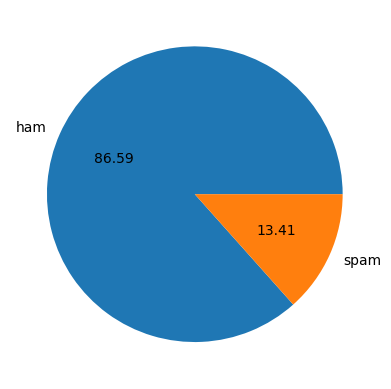

In [397]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [398]:
import nltk 

In [399]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [400]:
# number of characters
data['num_characters'] = data['text'].apply(len)

In [401]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt', download_dir='C:/nltk_data')

from nltk.tokenize import word_tokenize
# Test with a simple sentence
try:
    sentence = "This is a simple test."
    tokens = word_tokenize(sentence)
    print(tokens)
except LookupError as e:
    print(e)


['This', 'is', 'a', 'simple', 'test', '.']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [402]:
# number of words
from nltk.tokenize import word_tokenize
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [403]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [404]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [405]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [406]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [407]:
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [408]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

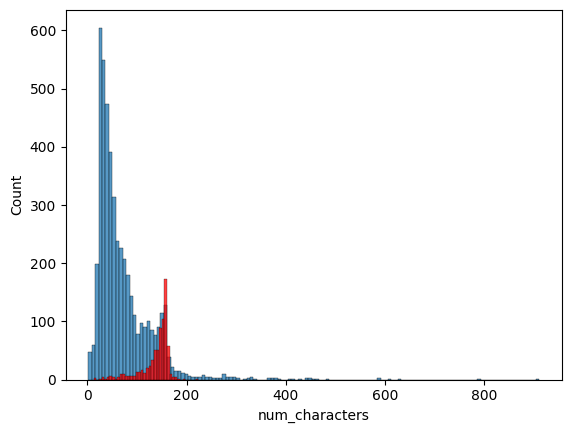

In [409]:
import seaborn as sns
sns.histplot(data[data['target']==0]['num_characters'])             # ham
sns.histplot(data[data['target']==1]['num_characters'],color='red') # spam

<Axes: xlabel='num_words', ylabel='Count'>

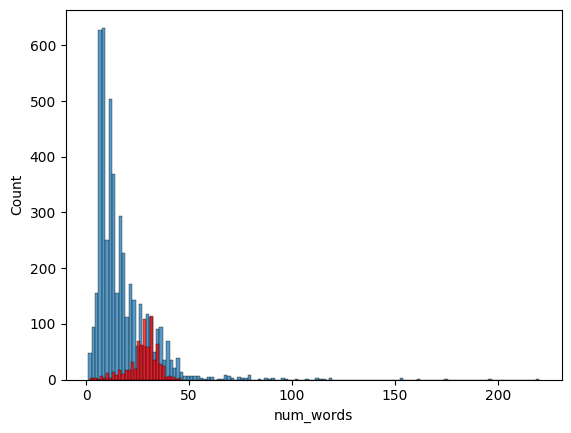

In [410]:
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')


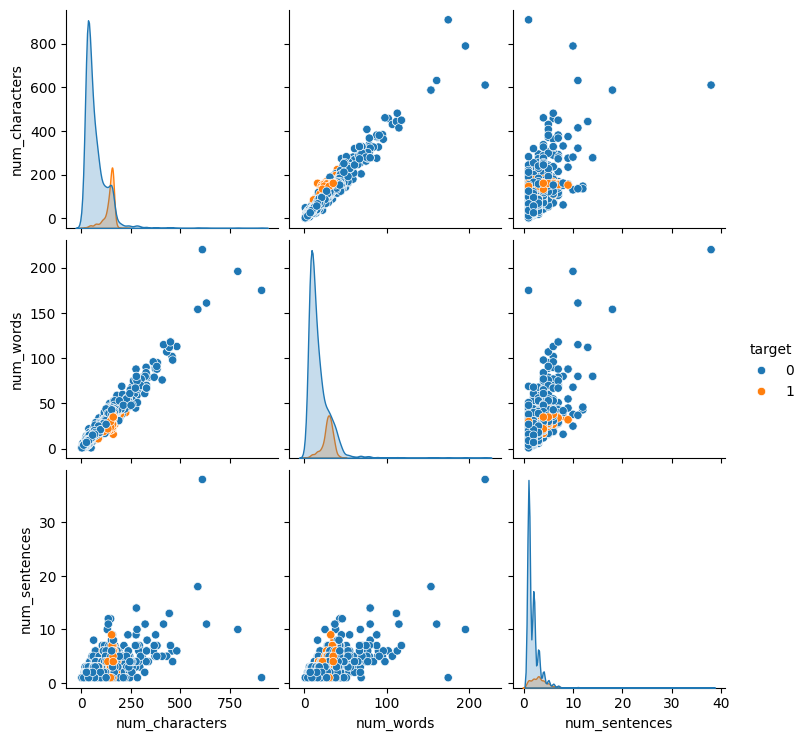

In [411]:
sns.pairplot(data,hue='target')

In [412]:
data.sample(5)

,target,text,num_characters,num_words,num_sentences
3921,0,"Oh really? perform, write a paper, go to a mov...",78,21,2
2199,0,Not sure I have the stomach for it ...,38,9,1
2433,0,Indians r poor but India is not a poor country...,632,161,11
436,0,"Ask g or iouri, I've told the story like ten t...",58,14,1
5497,1,"SMS SERVICES. for your inclusive text credits,...",158,27,4


In [413]:
df = data[['target', 'num_characters', 'num_words', 'num_sentences']]
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


<Axes: >

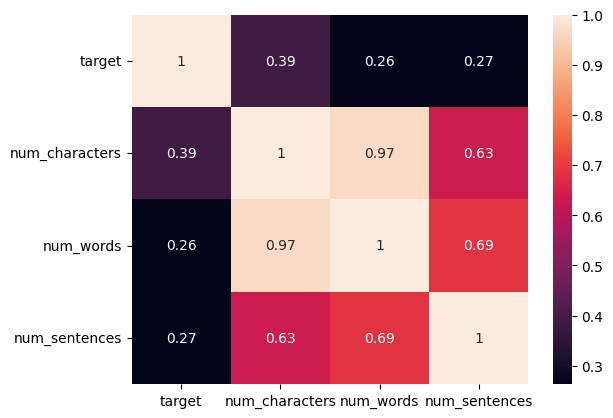

In [414]:
sns.heatmap(df.corr(),annot=True)

In [415]:
# we will keep num_characters as it has very strong correlation with the target value

### DATA PREPROCESSING
- Lower Case
- Tokenization
- Removing special characters
- Removing Stopwords and Punctuation
- Stemming

In [416]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text :
        if i.isalnum() :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))

    return " ".join(y)

In [417]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [418]:
transform_text('Hi ,how are you Ayush ? , I am dancing in the park .')

'hi ayush danc park'

In [419]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [420]:
data['transformed_text'] = data['text'].apply(transform_text)

In [421]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [422]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') 

In [423]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

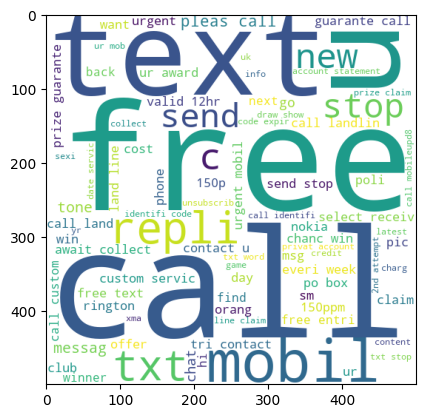

In [424]:
plt.imshow(spam_wc)

In [425]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

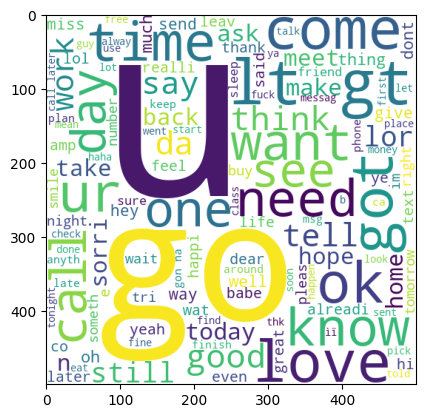

In [426]:
plt.imshow(ham_wc)

In [427]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [428]:
len(spam_corpus)

11490

In [429]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


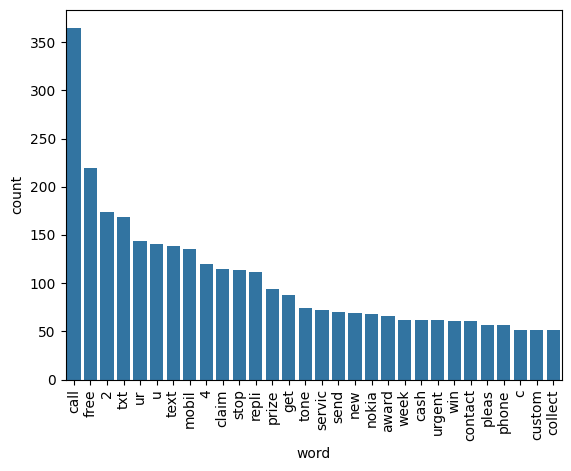

In [430]:
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_corpus_df)
plt.xticks(rotation='vertical')  # Rotate the x-axis labels for better readability
plt.show()

In [431]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

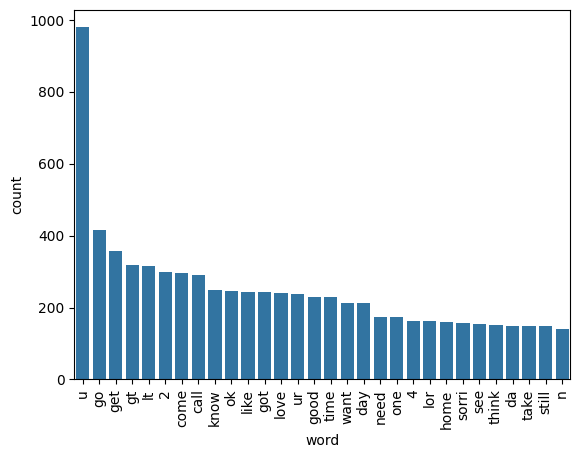

In [432]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=ham_corpus_df)
plt.xticks(rotation='vertical')  # Rotate the x-axis labels for better readability
plt.show()

### MODEL BUILDING

In [433]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [434]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [435]:
X.shape

(5572, 3000)

In [436]:
y = data['target'].values

In [437]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [438]:
from sklearn.model_selection import train_test_split

In [439]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [440]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [441]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [442]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [443]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [444]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [445]:
#  tfidf -> mnb

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [447]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [448]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [449]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [450]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9730941704035875, 0.9848484848484849)

In [451]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9730941704035875
Precision -  0.9848484848484849
For  KN
Accuracy -  0.9031390134529148
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9246636771300448
Precision -  0.87
For  LR
Accuracy -  0.9506726457399103
Precision -  0.9557522123893806
For  RF
Accuracy -  0.968609865470852
Precision -  0.984251968503937
For  AdaBoost
Accuracy -  0.9121076233183857
Precision -  0.8947368421052632
For  BgC
Accuracy -  0.9605381165919282
Precision -  0.9191176470588235
For  ETC
Accuracy -  0.9730941704035875
Precision -  1.0
For  GBDT
Accuracy -  0.9399103139013453
Precision -  0.941747572815534


In [452]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [453]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903139,1.000000
8,ETC,0.973094,1.000000
2,NB,0.965022,0.991736
0,SVC,0.973094,0.984848
5,RF,0.968610,0.984252
4,LR,0.950673,0.955752
9,GBDT,0.939910,0.941748
7,BgC,0.960538,0.919118
6,AdaBoost,0.912108,0.894737
3,DT,0.924664,0.870000


In [454]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [455]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903139
1,ETC,Accuracy,0.973094
2,NB,Accuracy,0.965022
3,SVC,Accuracy,0.973094
4,RF,Accuracy,0.968610
5,LR,Accuracy,0.950673
6,GBDT,Accuracy,0.939910
7,BgC,Accuracy,0.960538
8,AdaBoost,Accuracy,0.912108
9,DT,Accuracy,0.924664


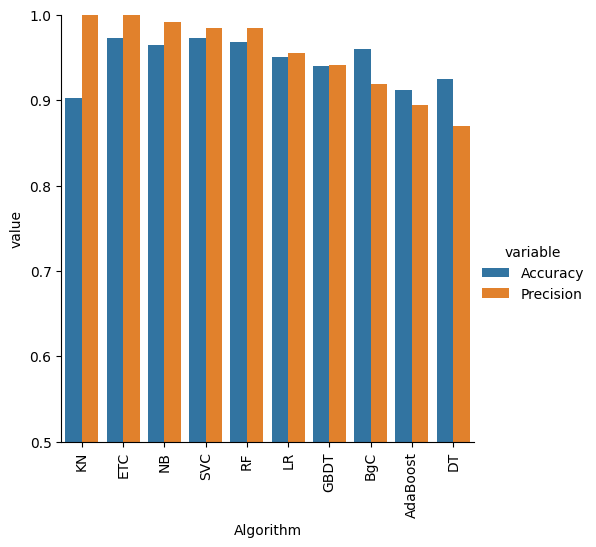

In [456]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [457]:
# Improving the model 
# 1. change the max_features parameters of tfidf
# 2. checking scaling of the data
# 3. checking the model's performance by adding num_characters in column 

In [458]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [459]:
performance_df1.merge(temp_df,on='Algorithm')

,Algorithm,variable,value,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,Accuracy,0.903139,0.903139,1.000000
1,ETC,Accuracy,0.973094,0.973094,1.000000
2,NB,Accuracy,0.965022,0.965022,0.991736
3,SVC,Accuracy,0.973094,0.973094,0.984848
4,RF,Accuracy,0.968610,0.968610,0.984252
5,LR,Accuracy,0.950673,0.950673,0.955752
6,GBDT,Accuracy,0.939910,0.939910,0.941748
7,BgC,Accuracy,0.960538,0.960538,0.919118
8,AdaBoost,Accuracy,0.912108,0.912108,0.894737
9,DT,Accuracy,0.924664,0.924664,0.870000


In [460]:
# voting classifier : majority wins
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier 

In [461]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [462]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [463]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775784753363229
Precision 1.0


In [464]:
# Applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [465]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [466]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [471]:
import pickle 
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(voting,open('model2.pkl','wb'))

In [472]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(voting)
    print("The model is fitted.")
except:
    print("The model is not fitted.")


The model is fitted.
